# Practical Machine Learning with scikit-learn
## Advanced Python for Life Sciences @ Physalia courses (Summer 2025)
### Marco Chierici, Fondazione Bruno Kessler - Data Science For Health

# Summary

In this handout we will go through basic concepts of machine learning using Python and scikit-learn, first on the classic Iris dataset and then on real-world tabular data.

# Objectives

- Learn software tools that allow the implementation of a typical predictive pipeline, with focus on classification.

---

# Short intro/recap

Machine learning is about building predictive models: the process of extracting knowledge from data automatically, usually with the goal of making predictions on new, unseen data. 

Central to machine learning is the concept of **automating decision making** from data **without the user specifying explicit rules** how this decision should be made.

The second central concept is **generalization**. The goal of a machine learning model is to predict on new, previously unseen data. In a real-world application, we are not interested in marking an already labeled email as spam or not. Instead, we want to make the user's life easier by automatically classifying new incoming mail.

![ml-workflow](https://raw.githubusercontent.com/amueller/scipy-2016-sklearn/38caa5ac44c9b0ba34821432846a15f4f112ad2d/notebooks/figures/supervised_workflow.svg)

The **data** is presented to the algorithm usually as a **two-dimensional array** (or matrix) of numbers. Each data point (also known as a **sample** or training instance) that we want to either learn from or make a decision on is represented as a list of numbers, a so-called **feature** vector, and its containing features represent the properties of this point.


Shortly, we will work with a **popular dataset called Iris,** a classic benchmark dataset in the field of machine learning. It contains the measurements of 150 iris flowers from 3 different species: Iris setosa, Iris versicolor, and Iris virginica. 


We represent each flower sample as one row in our data array, and the columns (features) represent the flower measurements in centimeters. For instance, we can represent this Iris dataset, consisting of 150 samples and 4 features, a 2-dimensional array or matrix $\mathbb{R}^{150 \times 4}$ in the following format:


$$\mathbf{X} = \begin{bmatrix}
    x_{1}^{(1)} & x_{2}^{(1)} & x_{3}^{(1)} & \dots  & x_{4}^{(1)} \\
    x_{1}^{(2)} & x_{2}^{(2)} & x_{3}^{(2)} & \dots  & x_{4}^{(2)} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{1}^{(150)} & x_{2}^{(150)} & x_{3}^{(150)} & \dots  & x_{4}^{(150)}
\end{bmatrix}.
$$

(The superscript denotes the *i*th row, and the subscript denotes the *j*th feature, respectively.

## Supervised learning

- A data matrix X with *n* observations
- A target y, which is a property of each observation
- Goal: predict y


- Classification: y is discrete, made of different classes
- Regression: y is continuous, a numerical quantitiy


## Unsupervised learning

- A data matrix X with *n* observations
- Goal: extract from X a structure that is generalizable
- Wide variety of different problems: Principal Component Analysis, clustering, etc.

---

# Iris dataset starter

This initial section is meant as a starter to have a first glimpse at machine learning examples taking advantage of the Iris dataset. 

First, load required libraries:

In [1]:
# the following is a Jupyter "magic command":
# it tells Jupyter to output plots within the notebook
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn import datasets  # small datasets as a playground for machine learning # SciKit learn - sklearn
import matplotlib.pyplot as plt  # plotting library
import matplotlib as mpl

# other graphical parameters
mpl.rcParams["image.cmap"] = "viridis"

The **sklearn.datasets** package includes some small datasets that can be used for practice. One of them is the Iris dataset. 

We can load the dataset using the datasets loader:

In [2]:
iris = datasets.load_iris()

The datasets loader returns a dictionary-like object called <i>bunch</i> holding at least two items: 

- `data`, an <i>array</i> of shape `n_samples * n_features`
- `target`, a <i>numpy array</i> of length n_samples, containing the target values.

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Let's have a first look at the data.

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

The _data_ array (`iris.data` or equivalently `iris['data']`) contains 150 samples and 4 features. These dimensions can be accessed with the shape attribute:

In [5]:
iris["data"].shape
# or:
# iris.data.shape

(150, 4)

Let's inspect the feature names now:

In [6]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The feature labels are in the slot `target`:

In [7]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

The slot `target_names` holds the 1:1 correspondences between numerical codes and target names:

In [8]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

- Target coded as 0 is 'setosa'
- Target coded as 1 is 'versicolor'
- Target coded as 2 is 'virginica'

We can quickly decode the labels in this way:

In [9]:
iris["target_names"][iris["target"]]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

A more intuitive way of dealing with datasets of this type are **pandas dataframes**. In the code below, we convert the Iris dataset to a pandas dataframe and visualize its first five rows using the function **head()**.

In [10]:
iris_df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


And now let's add a `species` column with the verbose target names:

In [11]:
iris_df["species"] = iris["target_names"][iris["target"]]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data exploration

The data are now stored in a `pandas` dataframe.

Each row represents a "sample". In the field of machine learning or descriptive statistics, commonly used equivalent terms are "record", "instance", or "observation".

Each column represents a type of information that has been collected and is called a "feature". In the field of machine learning and descriptive statistics, commonly used equivalent terms are "variable", "attribute", or "covariate".

The column named **species** is our target variable (i.e., the variable which we want to predict). The three possible classes are

- 0 = Iris setosa
- 1 = Iris versicolor
- 2 = Iris virginica. 

The resulting prediction problem is therefore a 3-class classification problem. We will use the left-over columns (any column other than `species`) as input variables for our model.

In [12]:
# assign the species column to a variable, so that our code is more general
target_column = "species"
iris_df[target_column].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

We notice that classes are perfectly balanced.

### Visual inspection

Before building a predictive model, it is a good idea to look at the data:

* maybe the task you are trying to achieve can be solved without machine
  learning;
* you need to check that the information you need for your task is actually
  present in the dataset;
* inspecting the data is a good way to find peculiarities. These can arise
  during data collection (for example, malfunctioning sensor or missing
  values), or from the way the data is processed afterwards (for example
  capped values).

Let's look at the distribution of individual features, to get some insights about the data. We can start by plotting histograms: note that this only works for features containing numerical values.

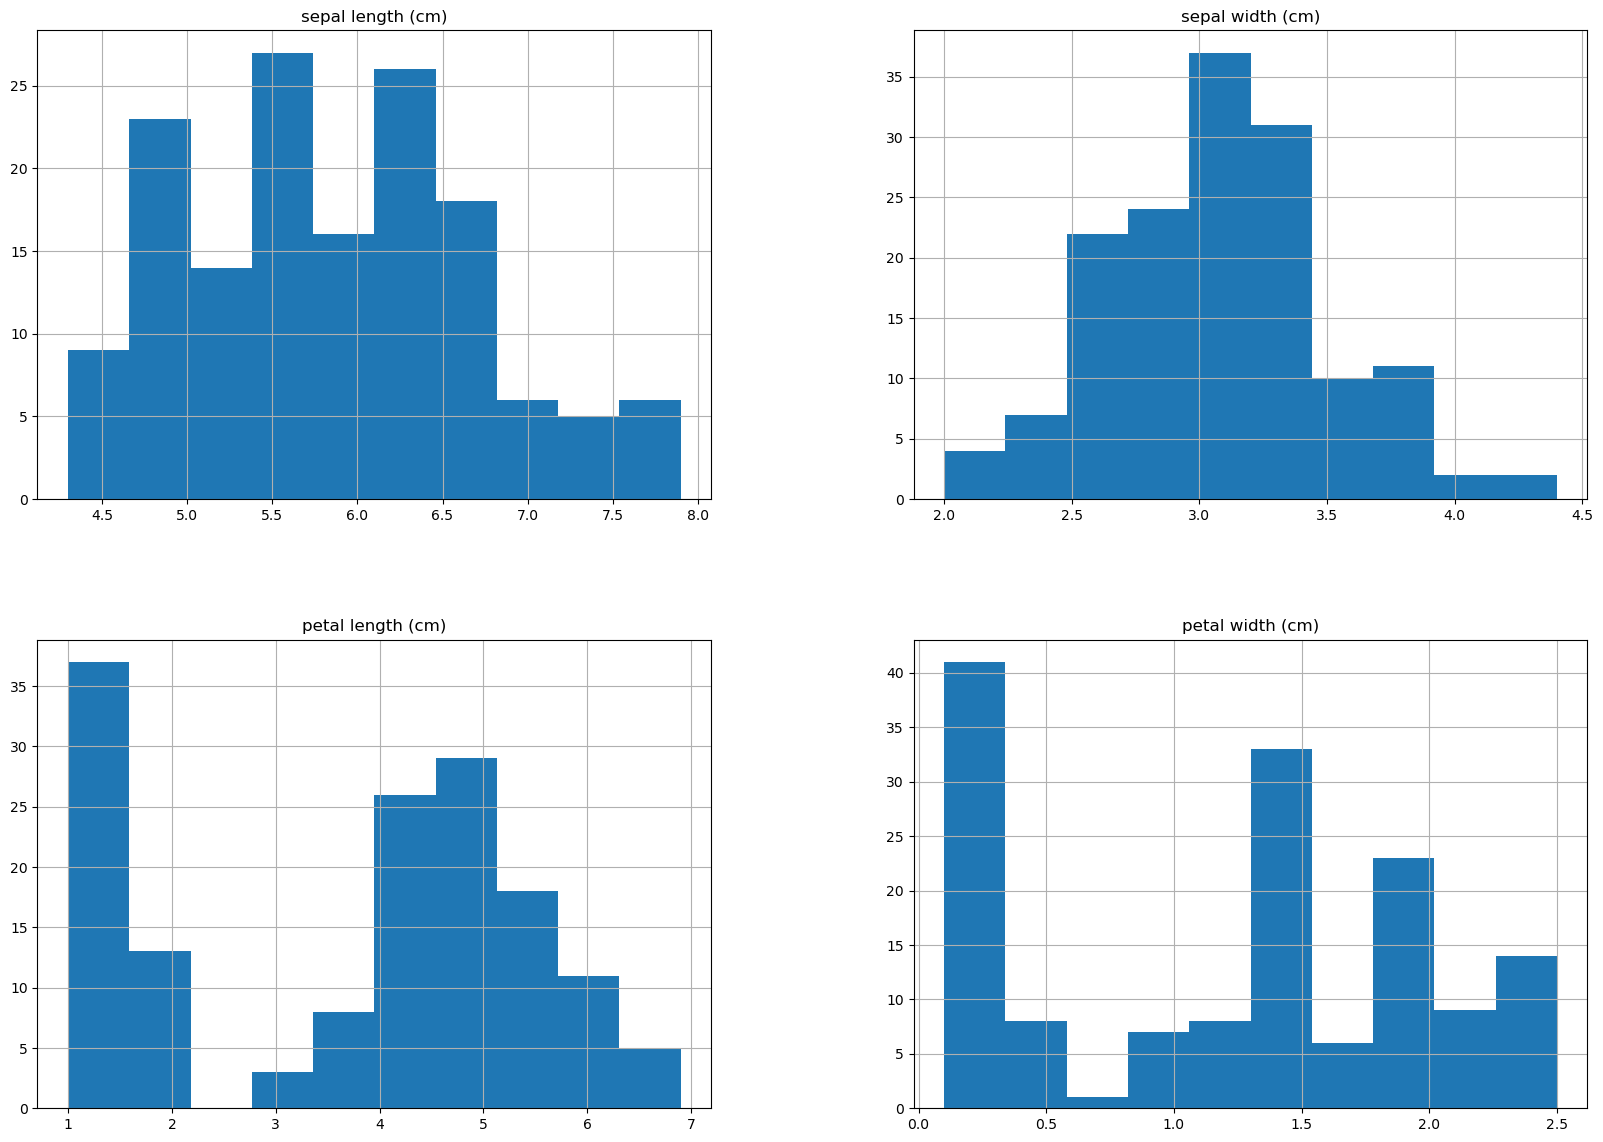

In [13]:
_ = iris_df.hist(figsize=(20, 14))
plt.show()

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last">In the previous cell, we used the following pattern: <tt class="docutils literal">_ = func()</tt>. We do this
to avoid showing the output of <tt class="docutils literal">func()</tt> which in this case is not that
useful. We actually assign the output of <tt class="docutils literal">func()</tt> into the variable <tt class="docutils literal">_</tt>
(called underscore). By convention, in Python the underscore variable is used
as a "garbage" variable to store results that we are not interested in.</p>
</div>

Let's look at the pairwise relationships between the variables. A convenient way to accomplish this is to do a `pairplot` and show how each variable differs according to our target, i.e. `"species"`.
Plots along the diagonal show the distribution of individual variables for each `"species"`.
The plots on the off-diagonal can reveal interesting interactions between variables.

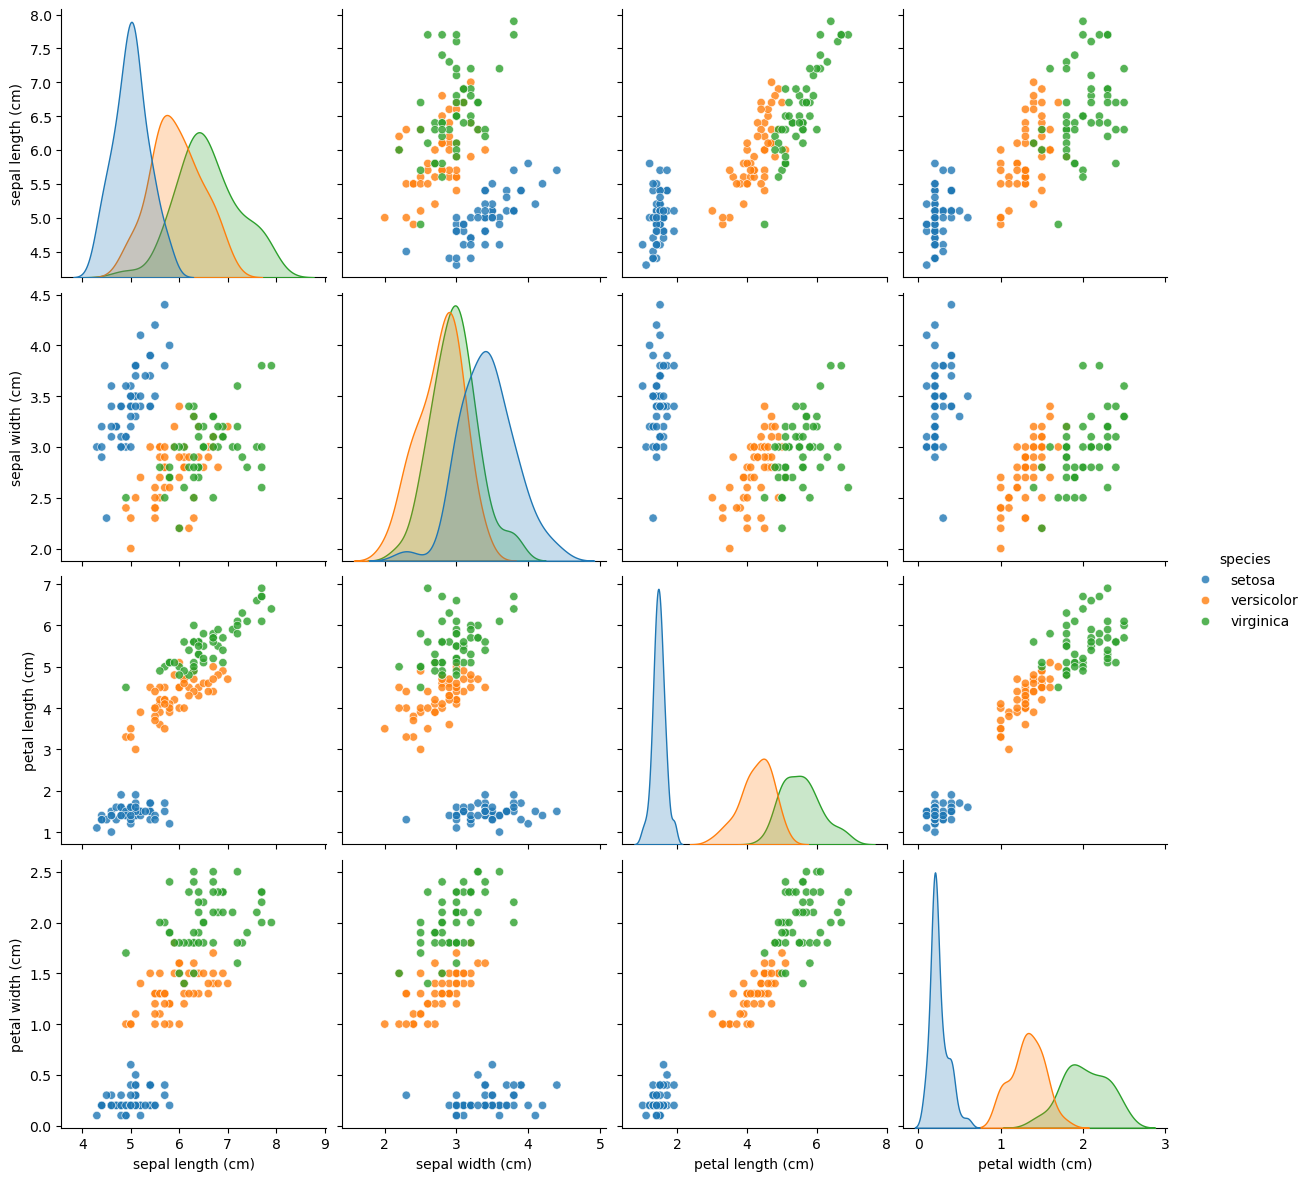

In [14]:
import seaborn as sns

# select columns to plot (all but the class column)
columns = iris_df.columns[:4]

_ = sns.pairplot(
    data=iris_df,
    vars=columns,
    hue=target_column,
    plot_kws={"alpha": 0.8},
    height=3,
    diag_kind="kde",  # kernel density estimates on the main diagonal
)
plt.show()

### Creating decision rules by hand

By looking at the previous plots, we could create some hand-written rules that
predict whether someone has a high- or low-income. For instance, we could
focus on the combination of the `"sepal length"` and `"petal length"` features.

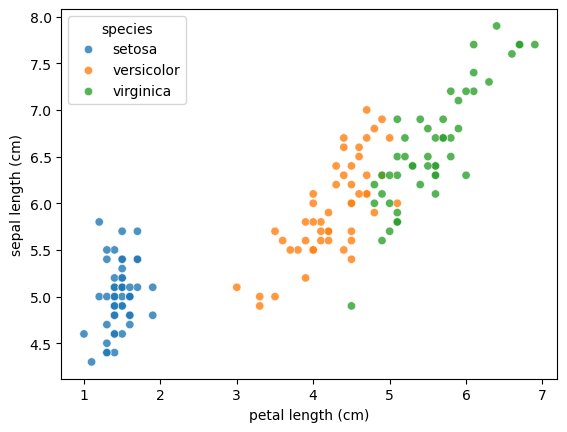

In [15]:
_ = sns.scatterplot(
    x="petal length (cm)",
    y="sepal length (cm)",
    data=iris_df,
    hue=target_column,
    alpha=0.8,
)
plt.show()

In this plot, we can try to find regions that mainly contains a single class such that we can easily decide what class one should predict. 

Machine learning is often used when creating rules by hand is not straightforward. For example because we are in high dimension (many features in a table) or because there are no simple and obvious rules that
separate the two classes as in the top-right region of the previous plot.

To sum up, the important thing to remember is that in a machine-learning setting, a model automatically creates the "rules" from the existing data in order to make predictions on new unseen data.

## Iris: unsupervised learning

### Principal Component Analysis

Principal Component Analysis (PCA) is a technique to reduce the dimensionality of the data, by creating a linear projection. That is, we find new features to represent the data that are a linear combination of the old data (i.e. we rotate it). Thus, we can think of PCA as a projection of our data onto a new feature space.

The way PCA finds these new directions is by looking for the directions of maximum variance. Usually only few components that explain most of the variance in the data are kept. Here, the premise is to reduce the size (dimensionality) of a dataset while capturing most of its information. There are many reason why dimensionality reduction can be useful: It can reduce the computational cost when running learning algorithms, decrease the storage space, and may help with the so-called "curse of dimensionality."

Now we apply a PCA on the 4-dimensional Iris dataset and look at the variance that is explained by each of the principal components. First off, we save again the data and the labels into two distinct variables:

In [16]:
X_iris = iris.data
y_iris = iris.target

`scikit-learn` makes it easy to compute the principal components through its module `decomposition`:

In [17]:
from sklearn import decomposition
# from sklearn.decomposition import PCA

pca = decomposition.PCA()
pca.fit(X_iris)

print('Variance percent explained:', pca.explained_variance_ratio_)

Variance percent explained: [0.92461872 0.05306648 0.01710261 0.00521218]


In [18]:
# get the documentation of a function
#help(decomposition.PCA)
# or
?decomposition.PCA

Init signature:
decomposition.PCA(
    n_components=None,
    *,
    copy=True,
    whiten=False,
    svd_solver='auto',
    tol=0.0,
    iterated_power='auto',
    n_oversamples=10,
    power_iteration_normalizer='auto',
    random_state=None,
)
Docstring:     
Principal component analysis (PCA).

Linear dimensionality reduction using Singular Value Decomposition of the
data to project it to a lower dimensional space. The input data is centered
but not scaled for each feature before applying the SVD.

It uses the LAPACK implementation of the full SVD or a randomized truncated
SVD by the method of Halko et al. 2009, depending on the shape of the input
data and the number of components to extract.

With sparse inputs, the ARPACK implementation of the truncated SVD can be
used (i.e. through :func:`scipy.sparse.linalg.svds`). Alternatively, one
may consider :class:`TruncatedSVD` where the data are not centered.

Notice that this class only supports sparse inputs for some solvers such as
"

We can reduce the dimensionality of the dataset by projecting it onto a 2-dimensional space, as an exercise.

In [19]:
# perform the PCA again, keeping only the first two components
pca = decomposition.PCA(n_components=2) # shif+tab gives you the options in ()
pca.fit(X_iris)

# actually transform the Iris data (i.e., apply the PCA transformation obtained using the fit function)
Z = pca.transform(X_iris)

# have a look at the first 20 rows
Z[:20:]


array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031]])

In [20]:
# convert Z to a pandas DataFrame, adding column names
df_2D = pd.DataFrame(Z, columns=["PC1", "PC2"])
# also add a species column
df_2D["species"] = iris_df["species"]
df_2D.head()

,PC1,PC2,species
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa


Great! We can now easily plot the resulting transformation, coloring points according to the species column.

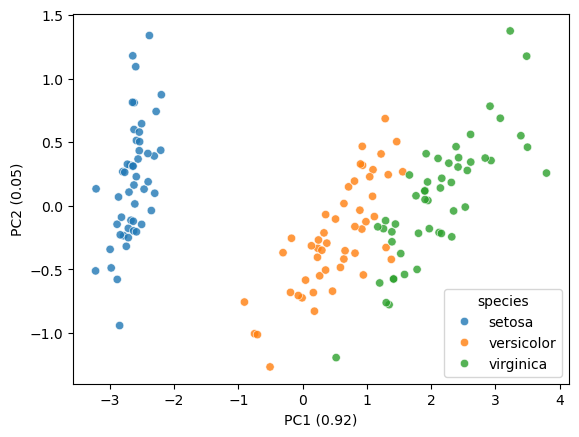

In [21]:
_ = sns.scatterplot(x="PC1", y="PC2", data=df_2D, hue=target_column, alpha=0.8)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2f})")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2f})")
plt.show()

#### Exercise

Perform another PCA, this time with 4 principal components. Print the explained variance ratio. Transform the Iris data according to this PCA, convert the transformed data to a Pandas dataframe, and plot the 3rd and 4th dimension. What can you conclude?

Variance percent explained: [0.92461872 0.05306648 0.01710261 0.00521218]


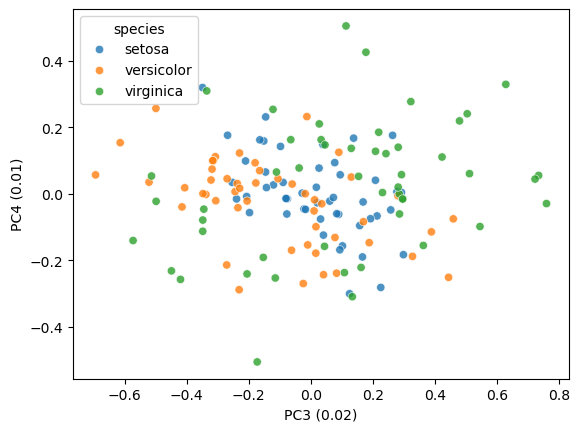

In [22]:
# perform the PCA again, keeping only the first two components
pca = decomposition.PCA(n_components=4) # shif+tab gives you the options in ()
pca.fit(X_iris)

print('Variance percent explained:', pca.explained_variance_ratio_)
# actually transform the Iris data (i.e., apply the PCA transformation obtained using the fit function)
Z = pca.transform(X_iris)

# convert Z to a pandas DataFrame, adding column names
df_2D = pd.DataFrame(Z, columns=["PC1", "PC2","PC3","PC4"])
# also add a species column
df_2D["species"] = iris_df["species"]
df_2D.head()

_ = sns.scatterplot(x="PC3", y="PC4", data=df_2D, hue=target_column, alpha=0.8)
plt.xlabel(f"PC3 ({pca.explained_variance_ratio_[2]:.2f})")
plt.ylabel(f"PC4 ({pca.explained_variance_ratio_[3]:.2f})")
plt.show()

---

### Clustering

Clustering is the task of gathering samples into groups of similar samples according to some predefined similarity or distance (dissimilarity) measure, such as the Euclidean distance. In this section we will explore a basic clustering task.


Let's consider the last two variables of `iris` and their labels (`species`). Here I'll extract them from the `iris` object:

In [23]:
X_iris = iris.data[:, 2:]
y_iris = iris.target

Make a plot to visualize how the data looks like (back to matplotlib now):

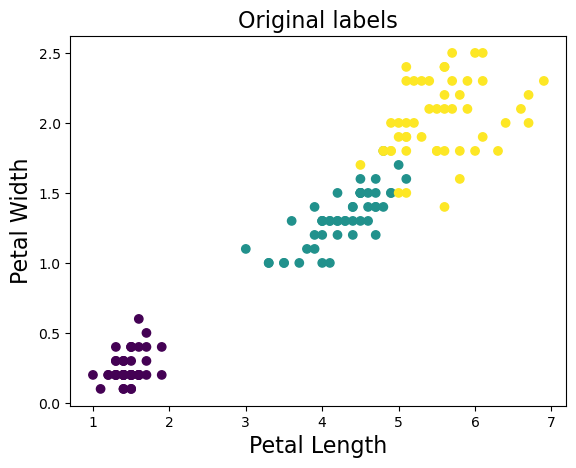

In [24]:
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris)
plt.xlabel("Petal Length", fontsize=16)
plt.ylabel("Petal Width", fontsize=16)
plt.title("Original labels", fontsize=16)
plt.show()


Now we will use one of the simplest clustering algorithms, K-means.
This is an iterative algorithm which searches for three cluster centers such that the distance from each point to its cluster is minimized. The standard implementation of K-means uses the Euclidean distance, which is why we want to make sure that all our variables are measured on the same scale if we are working with real-world datastets. 

In [25]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">In scikit-learn, to use a model you have to first create it and assign it to a variable. This variable is called an  "instance" of the model, using object-oriented programming notation.</p>
</div>

In [26]:
km.fit(X_iris)

KMeans(n_clusters=3, random_state=42)

The most important attribute we are interested in right now is the `labels_` (mind the trailing underscore), which contains the ID of the cluster that each point is assigned to. Save them into a new variable:

In [27]:
new_labels = km.labels_
new_labels


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Visually check how the clustering results compare to the original data partitioning into species.

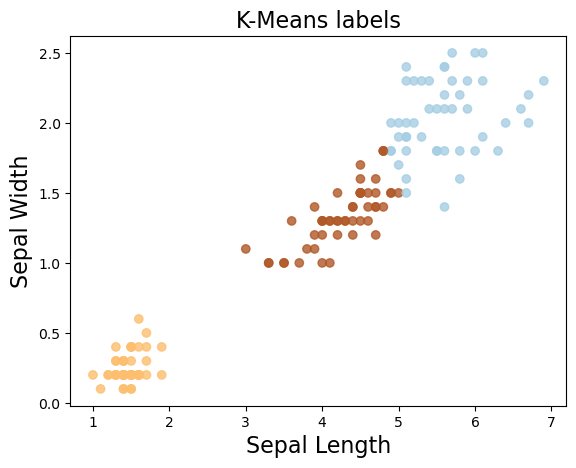

In [28]:
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=new_labels, alpha=0.8, cmap="Paired")
plt.xlabel("Sepal Length", fontsize=16)
plt.ylabel("Sepal Width", fontsize=16)
plt.title("K-Means labels", fontsize=16)
plt.show()

Compare to the true labels:

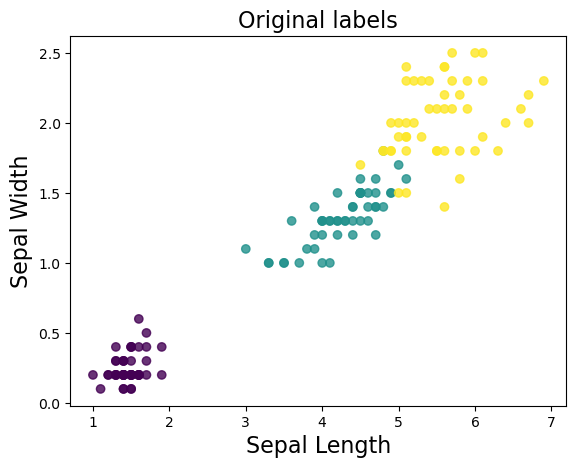

In [29]:
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, alpha=0.8)
plt.xlabel("Sepal Length", fontsize=16)
plt.ylabel("Sepal Width", fontsize=16)
plt.title("Original labels", fontsize=16)
plt.show()

We are probably satisfied with the clustering results, but in general we might want to have a more quantitative evaluation. Therefore, we must use a scoring metric, such as the `adjusted_rand_score`, which is invariant to permutations of the labels:

In [30]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(y_iris, new_labels)

0.8856970310281228

We choose now the sepal length/width pair of features, predict the clusters using KMeans, and plot the features and the predicted clusters on a scatter plot.

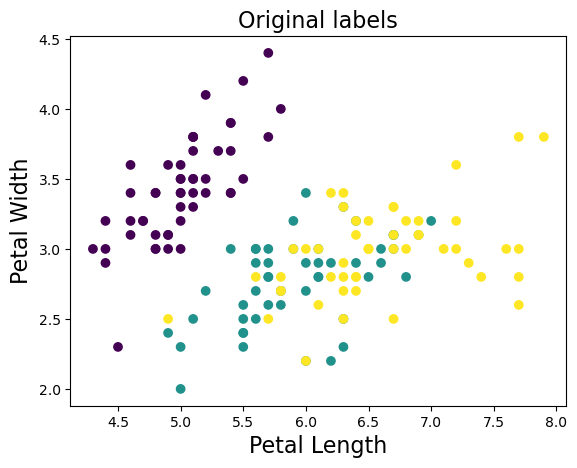

In [31]:
# prepare the data:
# sepal length&width are the first two columns
X_iris = iris.data[:, :2]
# redefine the target variable, just in case
y_iris = iris.target

plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris)
plt.xlabel("Petal Length", fontsize=16)
plt.ylabel("Petal Width", fontsize=16)
plt.title("Original labels", fontsize=16)
plt.show()

In [32]:
# fit a KMeans model on data, get the predicted cluster labels
km = KMeans(n_clusters=3, random_state=42)
# alternative way to get the clustering labels
new_labels = km.fit_predict(X_iris)

Visualize the assignments:

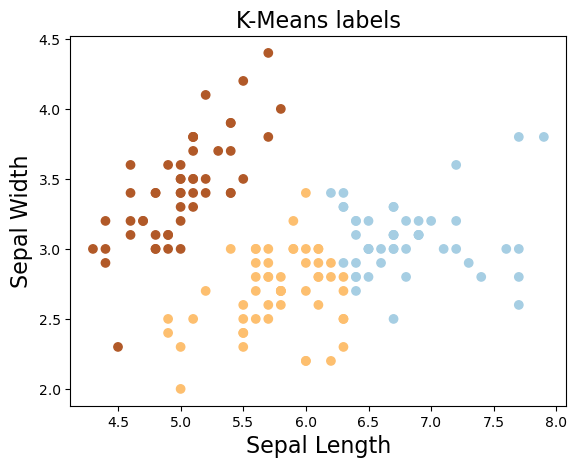

In [33]:
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=new_labels, cmap="Paired")
plt.xlabel("Sepal Length", fontsize=16)
plt.ylabel("Sepal Width", fontsize=16)
plt.title("K-Means labels", fontsize=16)
plt.show()

And lastly compute the adjusted Rand score:

In [34]:
adjusted_rand_score(y_iris, new_labels)

0.6006861021484542

#### Exercise

1. Fit a K-Means classifiers with 2, 4, and 5 clusters;
2. Plot and evaluate the clustering results.

In [35]:
import sklearn
print(sklearn.__version__)

1.5.1


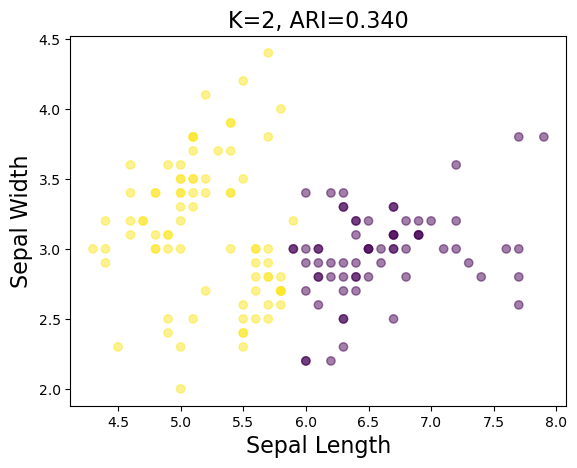

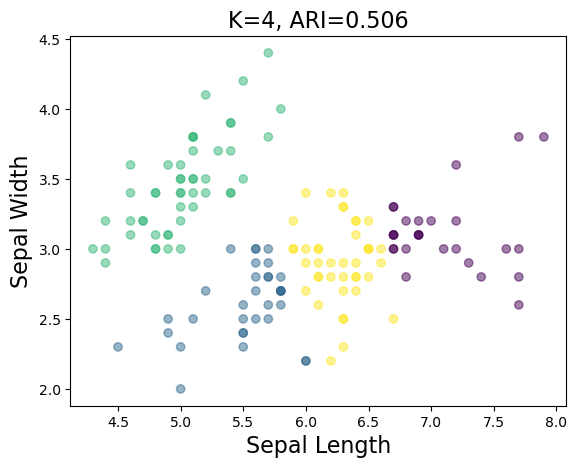

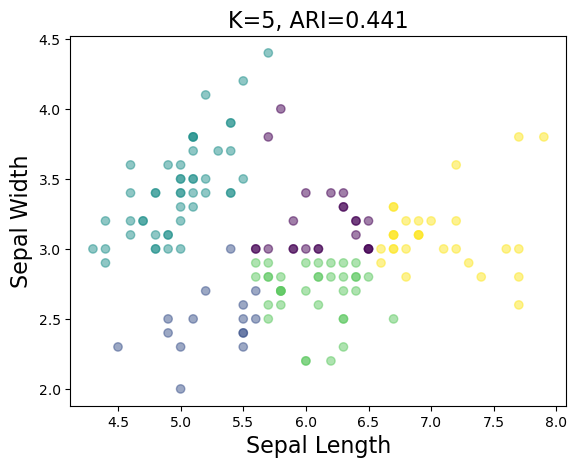

In [36]:
for nclust in [2, 4, 5]:

    km = KMeans(n_clusters=nclust, random_state=42)
    new_labels = km.fit_predict(X_iris)
    
    ARI = adjusted_rand_score(y_iris, new_labels)
    
    plt.scatter(X_iris[:, 0], X_iris[:, 1], c=new_labels, alpha=0.5)
    plt.xlabel("Sepal Length", fontsize=16)
    plt.ylabel("Sepal Width", fontsize=16)
    plt.title(f"K={nclust}, ARI={ARI:.3f}", fontsize=16)
    plt.show()

### Other notable clustering routines

- `sklearn.cluster.DBSCAN`: <br/>
    Can detect irregularly shaped clusters based on density, i.e. sparse regions in
    the input space are likely to become inter-cluster boundaries. Can also detect
    outliers (samples that are not part of a cluster).
- `sklearn.cluster.SpectralClustering`: <br/>
    KMeans applied to a projection of the normalized graph Laplacian: finds
    normalized graph cuts if the affinity matrix is interpreted as an adjacency matrix of a graph.
- `sklearn.cluster.Ward`: <br/>
    Ward implements hierarchical clustering based on the Ward algorithm,
    a variance-minimizing approach. At each step, it minimizes the sum of
    squared differences within all clusters (inertia criterion).

---

## Iris: supervised learning

To easily visualize the results of machine learning algorithms, it is often helpful to study two-dimensional data. While in practice datasets usually have many more features, it is hard to visualize such high-dimensional data in a meaningful way.

In the following, we will restrict the Iris dataset to the sepal length/width feature pair and apply two simple yet popular classification algorithms: logistic regression and kNN.

In [37]:
# tip: although we already did this earlier, it is good practice to redefine the variables, 
# just in case something happened in-between...
X_sepal = iris.data[:, :2]
y = iris.target

### First supervised model with scikit-learn: Logistic regression

Logistic regression is an example of a linear classification model that uses the logistic function to model the probability, when the target has a binary outcome. For multiclass tasks like the Iris one, scikit-learn adopts the "one-versus-rest" strategy for logistic regression.

A linear classifier defines a linear separation to split classes using a linear combination of the input features. In a 2D space, this means that a linear classifier will define some oblique lines that best separate the classes.
All models in scikit-learn have a very consistent interface. Every algorithm is exposed via an "Estimator" object. For instance, we first import the logistic regression class.

In [38]:
from sklearn.linear_model import LogisticRegression

Next, we instantiate the `LogisticRegression` estimator object with default parameters:

In [39]:
clf=LogisticRegression()

To built the model from the data, i.e. to learn how to classify new points, we call the ``fit`` method, as before. This time, however, we also need to pass the training labels together with the data, because we are doing supervised learning. The training labels act as the desired output for the training data points:

In [40]:
clf.fit(X_sepal,y)

LogisticRegression()

(Some estimator methods such as `fit` return `self` by default. Thus, after executing the code snippet above, you will see the default parameters of this particular instance of `LogisticRegression`. Another way of retrieving the estimator's ininitialization parameters is to execute `classifier.get_params()`, which returns a parameter dictionary.)

Let's use our model to make some predictions using the same dataset.

In [41]:
target_pred = 

SyntaxError: invalid syntax (3895458719.py, line 1)

To predict, a model uses a **prediction function** that will use the input data together with the model states. The prediction function is specific for each type of model.

Let's now have a look at the computed predictions. For the sake of simplicity, we will look at the ten first predicted targets.

In [ ]:
target_pred[:10]

Indeed, we can compare these predictions to the actual data...

In [ ]:
y[:10]

...and we could even check if the predictions agree with the real targets:

In [ ]:
y == target_pred

To count the number of True predictions, we can just compute the sum of `target_pred`! That's because True counts as 1, and False as 0.

In [ ]:
n_correct = (y == target_pred).sum()
print(f"Number of correct predictions: {n_correct} / {y.shape[0]}")

To get a better assessment, we can compute the average success rate, or **accuracy**:

In [ ]:
(y == target_pred).mean()

This result means that the model makes a correct prediction for approximately 82 samples out of 100.
Note that we used the same data to train and evaluate our model.

*Can this evaluation be trusted or is it too good to be true?*

LogisticRegression is a linear model, so it will create a decision boundary that is linear in the input space. These boundary lines indicate where the model changes its prediction from one class to another.

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

# create a palette to be used in the scatterplot
palette = ["tab:red", "black", "tab:blue"]

iris_columns = ["sepal length (cm)", "sepal width (cm)"]

DecisionBoundaryDisplay.from_estimator(
    clf, X_sepal, response_method="predict", cmap="RdBu", alpha=0.5
)
sns.scatterplot(
    data=iris_df, x=iris_columns[0], y=iris_columns[1], hue="species", palette=palette
)
# legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("Decision boundary using a logistic regression")


**Estimated parameters**: All the estimated model parameters are attributes of the estimator object ending by an underscore. Here, these are the coefficients and the offset of the lines:

In [ ]:
print(clf.coef_)
print(clf.intercept_)

### K-nearest neighbors

Another popular and easy to understand classifier is K-nearest neighbors (k-NN).  It has one of the simplest learning strategies: to predict the target of a new sample, it takes into account its `k` closest samples in the training set and predicts the majority target of these samples.

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Warning</p>
<p class="last">We use a k-NN here. However, be aware that it is seldom useful in practice. We use it because it is an intuitive algorithm. Further in the notebook, we will introduce better models.</p>
</div>

The interface is exactly the same as for ``LogisticRegression`` above.

Create a k-NN instance (with default parameters) and fit the model. Note that default parameters imply the number of neighbors set to 5.

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_sepal, y)

KNeighborsClassifier()

As before, let's use the trained k-NN model to make some predictions using the same dataset.

In [43]:
knn_pred = knn.predict(X_sepal)

Compute the average success rate (accuracy):

In [44]:
(y == knn_pred).mean()

0.84

Again we plot the decision boundaries:

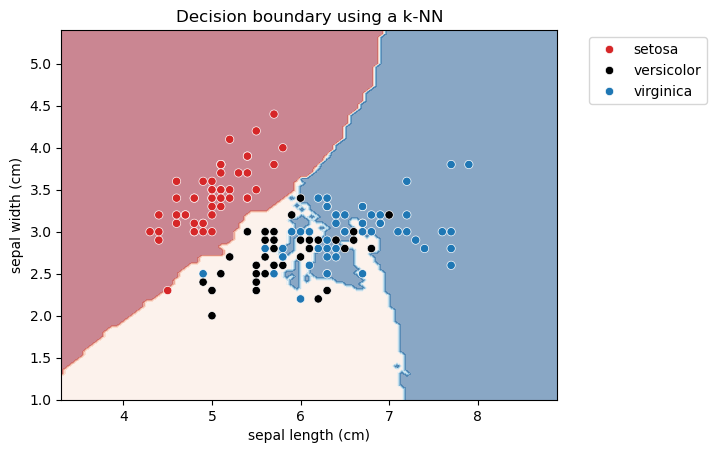

In [45]:
from sklearn.inspection import DecisionBoundaryDisplay

# create a palette to be used in the scatterplot
palette = ["tab:red", "black", "tab:blue"]

iris_columns = ["sepal length (cm)", "sepal width (cm)"]

DecisionBoundaryDisplay.from_estimator(
    knn, X_sepal, response_method="predict", cmap="RdBu", alpha=0.5
)
sns.scatterplot(
    data=iris_df, x=iris_columns[0], y=iris_columns[1], hue="species", palette=palette
)
# legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("Decision boundary using a k-NN")

plt.show()

---

## Train-test split

When building a machine learning model, it is important to evaluate the
trained model on data that was not used to fit it, as **generalization** is
more than memorization (meaning we want a rule that generalizes to new data,
without comparing to data we memorized).
It is harder to conclude on never-seen instances than on already seen ones.

Correct evaluation is easily done by leaving out a subset of the data when
training the model and using it afterwards for model evaluation.
The data used to fit a model is called **training data** (or training set) while the data used to
assess a model is called **testing data** (or test set).

The ``train_test_split`` function from the ``model_selection`` module does that for us -- we will use it to split the 2-feature Iris dataset into 75% training data and 25% test data.

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sepal, y, test_size=.25, stratify=y,random_state=99)
# capital X means it is a matrix, small y means it is a vetor

In [47]:
X_train.shape

(112, 2)

In [48]:
X_test.shape

(38, 2)

Let's repeat the training of a k-NN model, this time using a train/test split to better evaluate the performance of the trained classifier.

In [49]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

We can then apply the model to unseen data and use the model to predict the estimated outcome using the `predict` method:

In [50]:
kn_preds = clf.predict(X_test)

We can compare these against the true labels:

In [51]:
print(kn_preds)
print(y_test)

[1 1 0 1 2 1 0 2 0 0 1 2 2 0 1 1 0 0 0 0 2 1 2 1 2 0 2 1 0 1 0 1 1 2 1 1 2
 2]
[1 1 0 2 1 1 0 2 0 0 2 2 2 0 1 2 0 0 0 0 2 1 2 1 1 0 2 1 0 1 0 2 2 1 1 1 2
 2]


We can evaluate our classifier quantitatively by measuring what fraction of predictions is correct: this is called **accuracy**.

In [52]:
np.mean(kn_preds == y_test)

0.7894736842105263

There is also a convenience function , ``score``, that all scikit-learn classifiers have to compute this directly from the test data:

In [53]:
acc = clf.score(X_test,y_test)
model_name = clf.__class__.__name__

print(f"The test set accuracy using a {model_name} is {acc:.3f}")

The test set accuracy using a KNeighborsClassifier is 0.789


If we compare this accuracy with that obtained by wrongly evaluating the model on the training set, we find that this evaluation was indeed optimistic compared to the score obtained on a held-out test set.

It shows the importance to always testing the generalization performance of predictive models on a different set than the one used to train these models. We will discuss later in more detail how predictive models should be evaluated.

---

## Exercise

The goal of this exercise is to fit a k-NN model on the Iris dataset with all four features, in order to get familiar with manipulating scikit-learn objects and the fit/predict API.

We already used `clf = KNeighborsClassifier()`. All scikit-learn models can be created without arguments: this is convenient because it means that you don’t need to understand the full details of a model before starting to use it.

One of the `KNeighborsClassifier` parameters is `n_neighbors`. It controls the number of neighbors we are going to use to make a prediction for a new data point.

What is the default value of the `n_neighbors` parameter? Hint: Look at the documentation on the [scikit-learn website](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) or directly access the description inside your notebook by running the following cell. This will open a page pointing to the documentation.

In [54]:
# (we should already have imported this)
from sklearn.neighbors import KNeighborsClassifier
# to get help about any function:
KNeighborsClassifier?

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

1. Split the full-feature Iris data (hint: `iris.data`) and target into train/test sets.

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sepal, y, test_size=.25, stratify=y) # stratify based on y component distribution
# capital X means it is a matrix, small y means it is a vetor

2. Create a `KNeighborsClassifier` model with `n_neighbors=50`

In [56]:
clf = KNeighborsClassifier(n_neighbors=50)

3. Fit this model on the training data and target.

In [57]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

4. Use your model to make predictions on the first 10 data points. Do they match the actual target values?

In [58]:
kn_preds = clf.predict(X_train[:10,])
print(kn_preds)
print(y_train[:10])

[0 1 2 0 2 2 0 0 1 1]
[0 2 1 0 2 1 0 0 2 2]


5. Compute the accuracy on the training data.

In [59]:
acc = clf.score(X_train[:10,],y_train[:10])
model_name = clf.__class__.__name__

print(f"The first 10 items of train set accuracy using a {model_name} is {acc:.3f}")

The first 10 items of train set accuracy using a KNeighborsClassifier is 0.500


6. Compute the accuracy on the test data.

In [60]:
kn_preds = clf.predict(X_test)
print(kn_preds)
print(y_test)
acc = clf.score(X_test,y_test)
model_name = clf.__class__.__name__

print(f"The test set accuracy using a {model_name} is {acc:.3f}")

[1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 2 0 2 1 2 1 0 0 2 1 0 1 2 1 2 1 2 2 1 0 1
 0]
[1 1 2 0 2 0 0 2 0 2 1 0 0 0 1 1 2 0 2 1 2 2 0 0 1 2 0 1 1 1 1 2 2 2 2 0 1
 0]
The test set accuracy using a KNeighborsClassifier is 0.711


---

## Preprocessing for numerical features

We introduce here two new aspects:

- an example of preprocessing, namely **scaling numerical variables**;
- using a scikit-learn **pipeline** to chain preprocessing and model
  training.

In [61]:
# a pandas df containing only the features
data = iris_df.drop(columns=target_column)
# a pandas series with the targets
target = iris_df[target_column]

# split into train/test
data_train, data_test, target_train, target_test = train_test_split(data, 
                                                                    target, 
                                                                    random_state=99)

### Model fitting with preprocessing

A range of preprocessing algorithms in scikit-learn allow us to transform
the input data before training a model. In our case, we will standardize the
data and then train a new logistic regression model on that new version of
the dataset.

Let's start by printing some statistics about the training data.

In [62]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),112.0,5.830357,0.808941,4.3,5.1,5.80,6.4,7.9
sepal width (cm),112.0,3.058036,0.429674,2.0,2.8,3.00,3.4,4.2
petal length (cm),112.0,3.728571,1.770907,1.0,1.5,4.35,5.1,6.9
petal width (cm),112.0,1.191964,0.773565,0.1,0.3,1.30,1.8,2.5


We show how to apply normalization using a scikit-learn transformer
called `StandardScaler`. This transformer shifts and scales each feature
individually so that they all have a 0-mean and a unit standard deviation.

First, one needs to call the method `fit` in order to learn the scaling from
the data.

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # removes the difference between samples that are genereated by eg., different units and other fectors - uniform the scale - a form of normalization
# scaler stransforms the values to have mean=0 and SD=1
scaler.fit(data_train)

StandardScaler()

The `fit` method for transformers is similar to the `fit` method for
predictors. The main difference is that the former has a single argument (the
data matrix), whereas the latter has two arguments (the data matrix and the
target).

In this case, the algorithm needs to compute the mean and standard deviation
for each feature and store them into some NumPy arrays. Here, these
statistics are the model states.

We can inspect the computed means and standard deviations.

In [64]:
scaler.mean_

array([5.83035714, 3.05803571, 3.72857143, 1.19196429])

In [65]:
scaler.scale_

array([0.80532151, 0.42775126, 1.7629839 , 0.77010417])

Scaling the data is applied to each feature individually (i.e. each column in
the data matrix). For each feature, the scaler subtracts its mean and divide by its
standard deviation.

Once we have called the `fit` method, we can perform data transformation by
calling the method `transform`.

In [66]:
data_train_scaled = scaler.transform(data_train)
data_train_scaled

array([[ 1.20404441, -0.13567631,  1.00478999,  1.17910765],
       [ 0.45900035, -0.36945704,  0.3241258 ,  0.14028714],
       [ 1.0798704 ,  0.09810441,  0.55101386,  0.39999227],
       [-0.03769568, -0.83701849,  0.21068177, -0.24927055],
       [ 0.45900035, -0.60323776,  0.60773588,  0.78954996],
       [ 1.70074044,  0.33188514,  1.28840006,  0.78954996],
       [-0.03769568, -0.83701849,  0.09723774,  0.01043458],
       [-0.53439172,  1.50078876, -1.26409063, -1.28809105],
       [-1.03108775, -0.13567631, -1.20736861, -1.28809105],
       [-1.90030582, -0.13567631, -1.49097869, -1.41794361],
       [ 2.56995851,  1.73456949,  1.51528812,  1.04925509],
       [ 1.0798704 ,  0.09810441,  0.38084782,  0.27013971],
       [-0.41021771,  1.03322731, -1.37753466, -1.28809105],
       [-1.15526176, -1.53836066, -0.24309435, -0.24927055],
       [ 0.58317436,  0.79944659,  1.061512  ,  1.56866534],
       [ 2.19743648, -0.13567631,  1.62873215,  1.17910765],
       [-0.03769568, -0.

The method `fit_transform` is a shorthand method to call
successively `fit` and then `transform`.

In [67]:
# equivalent to the above cell:
# data_train_scaled = scaler.fit_transform(data_train)
# data_train_scaled

To transform the test data, we must only apply the `transform` method **without refitting the transformer**, because the test data should remain unseen until the very end, where we use it to compute the model estimates.

In [68]:
data_test_scaled = scaler.transform(data_test)

In [69]:
# convert back to pandas df
data_train_scaled = pd.DataFrame(data_train_scaled, columns=data_train.columns)
data_train_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02
mean,-4.884981e-15,7.692260e-16,1.665335e-16,-7.176799e-16
std,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00
min,-1.900306e+00,-2.473484e+00,-1.547701e+00,-1.417944e+00
25%,-9.069137e-01,-6.032378e-01,-1.264091e+00,-1.158238e+00
50%,-3.769568e-02,-1.356763e-01,3.524868e-01,1.402871e-01
75%,7.073484e-01,7.994466e-01,7.779019e-01,7.895500e-01
max,2.569959e+00,2.669692e+00,1.798898e+00,1.698518e+00


Notice that the mean of all the columns is close to 0 and the standard deviation in all cases is close to 1. 

In [70]:
data_test_scaled = pd.DataFrame(data_test_scaled, columns=data_test.columns)
data_test_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,38.000000,38.000000,38.000000,38.000000
mean,0.063604,-0.006482,0.065891,0.037772
std,1.107962,1.074343,1.003619,0.957630
min,-1.776132,-1.772141,-1.377535,-1.417944
25%,-1.000044,-0.603238,-1.207369,-1.028386
50%,0.024391,-0.135676,0.352487,0.140287
75%,0.831522,0.507221,0.792082,0.789550
max,2.321610,3.137254,1.685454,1.438813


We can easily combine sequential operations with a scikit-learn
`Pipeline`, which chains together operations and is used as any other
classifier or regressor. The helper function `make_pipeline` will create a
`Pipeline`: it takes as arguments the successive transformations to perform,
followed by the classifier or regressor model.

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline( StandardScaler(), LogisticRegression() ) # can also add PCA()
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [72]:
model.named_steps

{'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression()}

This predictive pipeline exposes the same methods as the final predictor:
`fit` and `predict` (and additional other ones such as `predict_proba`, `decision_function`,
or `score`).

In [73]:
model.fit(data_train, target_train) # use the pipeline as a model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])



To predict the targets given a test set, one uses the `predict` method.

In [74]:
predicted_target = model.predict(data_test)
predicted_target[:5]

array(['virginica', 'setosa', 'versicolor', 'virginica', 'setosa'],
      dtype=object)

In [75]:
model_name = model.__class__.__name__
score = model.score(data_test, target_test)
print(f"The accuracy using a {model_name} is {score:.3f} with {model[-1].n_iter_[0]} iterations.")

The accuracy using a Pipeline is 0.974 with 15 iterations.


We could compare this predictive model with a predictive model that does not scale features.

In [76]:
# create a model
model = LogisticRegression()
# fit on training data
model.fit(data_train, target_train)
model_name = model.__class__.__name__
# compute the accuracy score on the test data
score = model.score(data_test, target_test)
# output
print(f"The accuracy using a {model_name} is {score:.3f} with {model.n_iter_[0]} iterations.")

The accuracy using a LogisticRegression is 0.947 with 85 iterations.


We see that scaling the data before training the logistic regression was beneficial in terms of performance. Indeed, the number of iterations decreased (the model converged faster) and the generalization performance increased.

---

## Real-world data

Now that we got a grasp on these first fundamental concepts, we switch to the [Breast Cancer Wisconsin](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) data that we met previously.

The goal with this data is to **predict patient diagnosis** from characteristics of the cell nuclei present in the digitized image of a fine needle aspirate of a breast mass.

We read the data in, remove the NA column with `.dropna()`, and get rid of the patient IDs:

In [77]:
import pandas as pd
from pathlib import Path

DATADIR = Path("data")
bc_data = pd.read_csv(DATADIR / "breast_cancer_diagnostic_data.csv")
bc_data = bc_data.dropna(axis=1)
bc_data.drop(columns=["id"], inplace=True)
bc_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The column named **diagnosis** is our target variable. The two possible classes are `B` (benign) and
`M` (malignant). The resulting prediction problem is therefore a binary classification task. 

In [78]:
target_name = "diagnosis"
bc_data[target_name].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p>Here, classes are slightly imbalanced, meaning there are more samples of one or
more classes compared to others. In this case, we have more samples with
<tt class="docutils literal">"B"</tt> than with <tt class="docutils literal">"M"</tt>.</p>
<p class="last">Class imbalance happens often in practice and may need special techniques when building a predictive model.
For example, if we are trying to predict whether subjects will develop a rare disease, there will be a lot more healthy subjects than ill subjects in the dataset.</p>
</div>

For historical reasons, we also call the `B` class as the "negative class" and the `M` class as the "positive class" (more on this later!).

Except for the `diagnosis` variable, the dataset contains only numerical data: we separate here the target variable from the other predictors.

In [79]:
target = bc_data[target_name]
data_numeric = bc_data.drop(columns=target_name)

### Your turn: Train-test split

Split the data into train/test sets, using the default 75/25% partitioning. Pick a random seed of your choice. Save the outputs to `x_train`, `x_test`, `y_train`, and `y_test`.

In [80]:
x_train, x_test, y_train, y_test = train_test_split(data_numeric, target, test_size=0.25, random_state=99)

### Logistic regression

We can now create a model using the `make_pipeline` tool to chain the
preprocessing and the estimator in every iteration of the cross-validation.

As with the Iris data, we start with a logistic regression model.

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())

In [82]:
# fit the model
model.fit(x_train, y_train)
# predict on test data
y_pred_test = model.predict(x_test)
# compute accuracy on test data
# - method 1
score_m1 = np.mean(y_pred_test == y_test)
# - method 2
score_m2 = model.score(x_test, y_test)
# check they are equal
assert score_m1 == score_m2, "Something wrong happened!" # two scores should be the same, otherwise print the string.

model_name = model[-1].__class__.__name__
print(f"The accuracy using a {model_name} is {score_m2:.3f}")

The accuracy using a LogisticRegression is 0.979


### k-NN

In [83]:
model = make_pipeline(StandardScaler(), KNeighborsClassifier())
# fit the model
model.fit(x_train, y_train)
# predict on test data
y_pred_test = model.predict(x_test)
# compute accuracy on test data
score = model.score(x_test, y_test)

model_name = model[-1].__class__.__name__
print(f"The accuracy using a {model_name} is {score:.3f}")

The accuracy using a KNeighborsClassifier is 0.979


### Accuracy as a baseline

So far, we quantified the performance of a classifier in terms of accuracy, i.e. how many times the classifier was right divided by the number of samples in the set.

```python
np.mean(y_pred_test == y_test)
```

### Confusion matrix and derived metrics

The comparison that we did above and the accuracy that we calculated did not
take into account the _type of error_ our classifier was making. Accuracy is an
aggregate of the errors made by the classifier. We may be interested in finer
granularity - to know independently what the error is for each of the two
following cases:

- we predicted that a person has a Malignant diagnosis but they do not;
- we predicted that a person has a Benign diagnosis but they have a Malignant one.

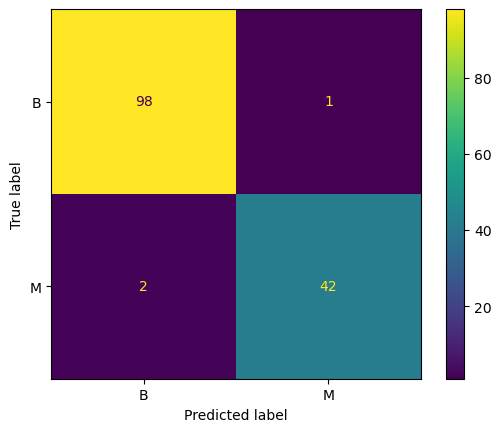

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator( model, x_test, y_test )
plt.show()

In [85]:
x_train.head().describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000
mean,12.571400,21.282000,81.164000,502.580000,0.086190,0.082530,0.064436,0.030018,0.187820,0.061990,...,13.918000,29.478000,92.23400,611.780000,0.124480,0.23296,0.245596,0.089770,0.287940,0.083900
std,2.511598,3.969278,17.712228,205.076795,0.009032,0.041765,0.065640,0.032880,0.025321,0.002071,...,2.472503,4.842801,19.54421,226.513503,0.010786,0.13162,0.201625,0.064589,0.030227,0.007526
min,9.667000,18.490000,61.490000,289.100000,0.073350,0.052750,0.018000,0.012560,0.161500,0.058880,...,11.140000,25.620000,70.88000,385.200000,0.111800,0.15420,0.076980,0.041950,0.244700,0.074290
25%,11.570000,19.040000,74.200000,409.700000,0.084370,0.062580,0.029480,0.014280,0.171300,0.061040,...,13.070000,26.980000,85.07000,520.500000,0.120800,0.16460,0.127700,0.065600,0.268700,0.081940
50%,12.000000,20.110000,76.770000,442.500000,0.085460,0.064500,0.040550,0.015140,0.179400,0.062670,...,13.090000,28.450000,86.43000,523.700000,0.123400,0.18560,0.181100,0.066640,0.303500,0.082840
75%,13.160000,20.540000,84.060000,538.700000,0.089460,0.077220,0.054850,0.019450,0.203100,0.063230,...,14.500000,28.460000,95.29000,648.300000,0.124900,0.19370,0.256000,0.071160,0.305400,0.085240
max,16.460000,28.230000,109.300000,832.900000,0.098310,0.155600,0.179300,0.088660,0.223800,0.064130,...,17.790000,37.880000,123.50000,981.200000,0.141500,0.46670,0.586200,0.203500,0.317400,0.095190


The in-diagonal numbers are related to predictions that were correct while off-diagonal numbers are related to incorrect predictions (misclassifications). 

From this information, we can compute metrics to highlight the generalization performance of our classifier in a particular setting. 

For instance, we could be interested in the fraction of people who really are `Malignant` when the classifier predicted so or the fraction of people predicted to be `Malignant` out of the total population that actually is so.

- The former metric, known as the **precision**, is defined as TP / (TP + FP)
and represents how likely the person is actually `Malignant` when the classifier
predicted that they are.
- The latter, known as the **recall**, is defined as TP / (TP + FN) and
assesses how well the classifier is able to correctly identify people who
are actually `Malignant`.

We could, similarly to accuracy, manually compute these values...

In [86]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred_test)
conf

array([[98,  1],
       [ 2, 42]])

In [87]:
tn, fp, fn, tp = conf[0, 0], conf[0, 1], conf[1, 0], conf[1, 1]
precision = tp / (tp + fp)
recall = tp / (tp + fn)

print(f"Manually computed precision is {precision:.3f}")
print(f"Manually computed recall is {recall:.3f}")

Manually computed precision is 0.977
Manually computed recall is 0.955


... however scikit-learn provides functions to compute these statistics:

In [88]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score( y_test, y_pred_test, pos_label="M" )
recall = recall_score( y_test, y_pred_test, pos_label="M" )

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

Precision: 0.977
Recall: 0.955


There is also a dedicated function for accuracy:

In [89]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_test)

print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.979


![precision_accuracy](https://i0.wp.com/gallery.mailchimp.com/077a77d8b088a7bd4137c3160/images/fa745be6-130d-4e69-9768-b006476fafcd.jpg?resize=300%2C311&ssl=1)

Another interesting metric to consider in our classification reports is the **Matthews Correlation Coefficient** (MCC).

![MCC formula](https://www.researchgate.net/profile/Pablo_Moscato/publication/223966631/figure/fig1/AS:305103086080001@1449753652505/Calculation-of-Matthews-Correlation-Coefficient-MCC-A-Contingency-matrix_W640.jpg)

MCC is generally regarded as a balanced measure of accuracy and precision in both binary and multiclass problems, even when the classes are imbalanced. It is a symmetric statistic ranging from -1 to 1, with:

- 1 meaning perfect prediction
- -1 inverse prediction
- 0 random guess or no relationship between target and predictors.

Compared to accuracy, the MCC is a more reliable metric which produces a high score only if the prediction obtained good results in all of the four confusion matrix categories.

See also:
- [Baldi P et al, 2000](https://academic.oup.com/bioinformatics/article/16/5/412/192336)
- [Chicco D & Jurman G, 2020](https://link.springer.com/article/10.1186/s12864-019-6413-7)

In [90]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred_test)
print(f"MCC: {mcc:.3f}")

MCC: 0.951


---

## The need for Cross-validation

Previously, we split the original data into a training set and a
testing set with the `train_test_split` function.
The score of a model will in general depend on the way we make
such a split. One downside of doing a single split is that it does not give
any information about this variability. Another downside, in a setting where
the amount of data is small, is that the data available for training and
testing will be even smaller after splitting.

Instead, we can use **cross-validation** (CV). Cross-validation consists of repeating
the procedure such that the training and testing sets are different each time.
Generalization performance metrics are collected for each repetition and then
aggregated (i.e., averaged and used to compute confidence intervals).
As a result we can assess the variability of our measure of the model's generalization performance.

Note that there are several CV strategies, each of them
defining how to repeat the `fit`/`score` procedure. In this section, we will
use the K-fold strategy: the entire dataset is split into `K` partitions. The
`fit`/`score` procedure is repeated `K` times where at each iteration `K - 1`
partitions are used to fit the model and `1` partition is used to score.

![k-fold cv](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

*(image credit: scikit-learn.org)*

CV is therefore computationally intensive because it requires
training several models instead of one.

In scikit-learn, the function `cross_validate` allows you to do CV
and you need to pass it the model, the data, and the target. Since there
exists several CV strategies, `cross_validate` takes a parameter
`cv` which defines the splitting strategy.

Here is an example of a 5-fold CV:

In [91]:
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), LogisticRegression())
cv_result = cross_validate( model, data_numeric, target, cv=5 )
cv_result

{'fit_time': array([0.01851273, 0.0090642 , 0.01165485, 0.01063442, 0.00946331]),
 'score_time': array([0.00356865, 0.00287533, 0.0040679 , 0.00256753, 0.00319219]),
 'test_score': array([0.98245614, 0.98245614, 0.97368421, 0.97368421, 0.99115044])}

The output of `cross_validate` is a Python dictionary, which by default
contains three entries:

- (i) the time to train the model on the training data for each fold, `fit_time`
- (ii) the time to predict with the model on the testing data for each fold, `score_time`
- (iii) the default score on the testing data for each fold, `test_score`.

Setting `cv=5` implements a 5-fold CV, creating 5 distinct splits to get 5 variations for the training
and testing sets. Setting `cv=5` or `cv=10` is a common practice, as it is a good
trade-off between computation time and stability of the estimated variability.

Note that by default the `cross_validate` function discards the `K` models
that were trained on the different overlapping subset of the dataset. **The goal
of cross-validation is not to train a model, but rather to estimate
approximately the generalization performance of a model that would have been
trained to the full training set**, along with an estimate of the variability
(uncertainty on the generalization accuracy).


Let's extract the scores computed on the test fold of each cross-validation
round from the `cv_result` dictionary and compute the mean accuracy and the
variation of the accuracy across folds.

In [92]:
scores = cv_result["test_score"]
print(f"The mean cross-validation accuracy is: {scores.mean():.3f} ± {scores.std():.3f}")

The mean cross-validation accuracy is: 0.981 ± 0.007


By computing the standard deviation of the CV scores, we can estimate the uncertainty of our model generalization performance. This is the main advantage of cross-validation and can be crucial in practice, for example when comparing different models to figure out whether one is better than the other or whether our measures of the generalization performance of each model are within the error bars of one-another.

### Typical setting

Cross-validation is used to estimate a model's performance on new, unseen data. So, after performing CV on a dataset, the next logical step would be to evaluate the model on new data: we expect the performance metrics to be similar to those obtained, on average, in cross-validation.

Since we don't have another portion of Breast Cancer data that we can use as test set, we split the whole data beforehand into training and test: then, we will perform CV on the training set and get predictions on the test set.

In [93]:
# initial train/test split
x_train, x_test, y_train, y_test = train_test_split(data_numeric, 
                                                    target, 
                                                    stratify = target,
                                                    test_size=0.25, 
                                                    random_state=99)
# define modeling pipeline
model = make_pipeline(StandardScaler(), LogisticRegression())
# perform 5-fold CV on x_train
cv_result = cross_validate(model, x_train, y_train, cv=5)

scores = cv_result["test_score"]
print(f"The mean cross-validation accuracy is: {scores.mean():.3f} ± {scores.std():.3f}")

# now, we refit the model on the whole training data...
model.fit(x_train, y_train)
# ... and predict labels on the unseen test set
y_pred_test = model.predict(x_test)
# compute test set performance
score_test = accuracy_score(y_pred_test, y_test)
print(f"The test set accuracy is: {score_test:.3f}")

The mean cross-validation accuracy is: 0.981 ± 0.012
The test set accuracy is: 0.951


We see that the test set performance is in line with our CV estimate! This is what should ideally happen. 

### Using a different CV strategy

We saw that passing an integer to the `cv` argument in `cross_validate` performs a 5-fold CV. Actually, there are several dedicated functions to perform cross-validation. Some of the most commonly used are:

- [`KFold()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) - this is called by default when `cv` is an integer
- [`RepeatedKFold()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedKFold.html) - repeats K-fold n times with different randomization in each repetition
- [`ShuffleSplit()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html) - randomly shuffles the order of the samples before splitting

All of them have their corrsponding "stratified" version, which means that the splitting is performed so as to preserve the original class frequency within each split:

- [`StratifiedKFold()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)
- [`RepeatedStratifiedKFold()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html)
- [`StratifiedShuffleSplit()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html)

It is always a good practice to use stratification within the CV framework, when dealing with a classification problem. Let's apply a stratified shuffle split CV on the breast cancer data:

In [94]:
from sklearn.model_selection import StratifiedShuffleSplit

# define the custom CV
cv = StratifiedShuffleSplit( n_splits=10 )
# define the modeling pipeline
model = make_pipeline(StandardScaler(), LogisticRegression())
# perform CV
cv_result = cross_validate(model, data_numeric, target, cv=cv)
cv_result

{'fit_time': array([0.01240063, 0.00828791, 0.02946472, 0.00783587, 0.01100564,
        0.01136041, 0.00711942, 0.00913095, 0.00769258, 0.0072422 ]),
 'score_time': array([0.00219011, 0.00369382, 0.0019989 , 0.00189042, 0.00372553,
        0.00190043, 0.00282073, 0.00182533, 0.00179434, 0.00179386]),
 'test_score': array([0.92982456, 0.96491228, 0.98245614, 1.        , 1.        ,
        0.98245614, 1.        , 0.98245614, 0.96491228, 0.96491228])}

In [95]:
scores = cv_result["test_score"]
print(f"The mean cross-validation accuracy is: {scores.mean():.3f} ± {scores.std():.3f}")

The mean cross-validation accuracy is: 0.977 ± 0.021


#### Finer control over CV - or, what happens under the hood

For a quick assessment of the model performance, the `cross_validate` function is a great starting point.

However, if you want better control over the CV loop you may want to use the CV functions directly to "manually" split the data into the CV train/test partitions.

With this in mind, let's rewrite the last example above:

In [96]:
# define the custom CV
cv = StratifiedShuffleSplit(n_splits=10)
# define the modeling pipeline
model = make_pipeline(StandardScaler(), LogisticRegression())
# create empty list to store accuracy metrics
acc_list = []

# split data and iterate over the splits,
# computing classifier accuracy on each test partition
for n, (idx_tr, idx_va) in enumerate(cv.split(data_numeric, target)):
    print(f"### Iteration {n}")
    data_train, target_train = data_numeric.iloc[idx_tr], target[idx_tr]
    data_valid, target_valid = data_numeric.iloc[idx_va], target[idx_va]
    
    model.fit(data_train, target_train)
    y_valid_pred = model.predict(data_valid)
    acc = accuracy_score(target_valid, y_valid_pred)
    
    print(f"Accuracy on TEST set: {acc:.3f}")
    print()
    ## append values to lists
    acc_list.append(acc)

scores = np.array(acc_list)
print(f"The mean cross-validation accuracy is: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

### Iteration 0
Accuracy on TEST set: 0.947

### Iteration 1
Accuracy on TEST set: 0.982

### Iteration 2
Accuracy on TEST set: 1.000

### Iteration 3
Accuracy on TEST set: 0.947

### Iteration 4
Accuracy on TEST set: 0.982

### Iteration 5
Accuracy on TEST set: 0.965

### Iteration 6
Accuracy on TEST set: 1.000

### Iteration 7
Accuracy on TEST set: 0.965

### Iteration 8
Accuracy on TEST set: 0.947

### Iteration 9
Accuracy on TEST set: 0.982

The mean cross-validation accuracy is: 0.972 ± 0.020


### Using a different reference metric

By default, `cross_validate` uses the accuracy as its reference score, but you can also specify a custom scoring strategy. This is especially useful for unbalanced data sets, where the use of accuracy can be misleading. First, you create a "scorer" object and then pass it to the `scoring` argument of `cross_validate`, as follows:

In [97]:
from sklearn.metrics import make_scorer
# create a MCC scorer
mcc_scorer = make_scorer(matthews_corrcoef) # MCC metrics
cv_result = cross_validate(model, data_numeric, target, cv=5, scoring=mcc_scorer)
cv_result

{'fit_time': array([0.01195955, 0.01051641, 0.01206636, 0.01123834, 0.0164597 ]),
 'score_time': array([0.00516033, 0.00416255, 0.00351405, 0.00360107, 0.00502729]),
 'test_score': array([0.96265968, 0.96299813, 0.94415495, 0.94333976, 0.98131913])}

In [98]:
scores = cv_result["test_score"]
print(f"The mean cross-validation MCC is: {scores.mean():.3f} ± {scores.std():.3f}")

The mean cross-validation MCC is: 0.959 ± 0.014


---

## Quiz time!

1. Go to [www.menti.com](https://www.menti.com/)
2. Enter the code 5673 1213

---

## Beyond logistic regression and k-NN

Two other broadly used classifiers are Support Vector Machines (SVMs) and Random Forests (RFs), as well as tree-based methods in general. As we will see, the convenient "fit/transform/predict" API of `scikit-learn` allows us to quickly change the classifier without affecting too much our existing pipeline.

### Exercise: Support Vector Machines

Support Vector Machines are implemented in scikit-learn in the `sklearn.svm.SVC` module. 

Import:

```from sklearn.svm import SVC```

Get help:

```SVC?```

In [107]:
from sklearn.model_selection import StratifiedKFold as SKF
from sklearn.svm import SVC
?SVC


Init signature:
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer or
other :ref:`kernel_approximation`.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the

1. Create a Pipeline chaining a standard scaler and a SVC with linear kernel (leave the other SVC parameters to the defaults).

In [108]:
# initial train/test split
x_train, x_test, y_train, y_test = train_test_split(data_numeric, 
                                                    target, 
                                                    stratify = target,
                                                    test_size=0.25, 
                                                    random_state=99)
# define modeling pipeline
model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# perform 5-fold CV on x_train
cv = SKF(n_splits=5) # StratifiedKFold(): stratify for cv folds
cv_result = cross_validate(model, x_train, y_train, cv=cv)

scores = cv_result["test_score"]
print(f"The mean cross-validation accuracy is: {scores.mean():.3f} ± {scores.std():.3f}")

# now, we refit the model on the whole training data...
model.fit(x_train, y_train)
# ... and predict labels on the unseen test set
y_pred_test = model.predict(x_test)
# compute test set performance
score_test = accuracy_score(y_pred_test, y_test)
print(f"The test set accuracy is: {score_test:.3f}")

The mean cross-validation accuracy is: 0.972 ± 0.020
The test set accuracy is: 0.965


2. Create a stratified 5-fold cross-validation (`from sklearn.model_selection import ...`, see the section "Using a different CV strategy" above)

3. Run `cross_validate` to train your model on the training data (`data_numeric` and `target`)

4. Get the accuracy scores on the test sets of the cross-validation and save them to a variable

5. Compute the average cross-validation accuracy

### Random Forest

Random Forest, as all tree-based models, is *insensitive to data rescaling*: so, we can decide to skip the scaling in our Pipeline and go on with the unscaled data, or we can use the previously scaled data without affecting the results. 

As an exercise, you can try to keep or skip the scaling, and verify that the results are the same.

In [109]:
from sklearn.ensemble import RandomForestClassifier as RFC

model = RFC(n_estimators=101, random_state=42)
cv = StratifiedKFold(n_splits=5)
cv_result = cross_validate(model, data_numeric, target, cv=cv)

scores = cv_result["test_score"]

model_name = model.__class__.__name__
print(f"The mean cross-validation accuracy of a {model_name} model is: {scores.mean():.3f} ± {scores.std():.3f}")

The mean cross-validation accuracy of a RandomForestClassifier model is: 0.956 ± 0.023


---

## Feature ranking

One type of insight you can gain from a machine learning model is the feature importance (or weight). Which characteristics of the cell nuclei are most likely to influence the classification of our breast cancer patients? Are some features pivotal, and others largely ignored?

Because a Random Forest model branches repeatedly on different features, the model becomes "aware" of which features are particularly influential in classifiying a patient. 

Scikit-learn allows us to read this information off of a trained Random Forest model through the `feature_importances_` attribute (mind the trailing underscore!).

In [110]:
# train/test split
x_train, x_test, y_train, y_test = train_test_split(data_numeric, 
                                                    target, 
                                                    test_size=0.25,
                                                    random_state=99)
# define modeling pipeline
model = RFC(n_estimators=101, random_state=1001)
# perform 5-fold CV on x_train
cv_result = cross_validate(model, x_train, y_train, cv=5)

scores = cv_result["test_score"]
print(f"The mean cross-validation accuracy is: {scores.mean():.3f} ± {scores.std():.3f}")

The mean cross-validation accuracy is: 0.953 ± 0.017


In [111]:
# now, we refit the model on the whole training data...
model.fit(x_train, y_train)
# ... and predict labels on the unseen test set
y_pred_test = model.predict(x_test)
# compute test set performance
score_test = accuracy_score(y_pred_test, y_test)
print(f"The test set accuracy is: {score_test:.3f}")

The test set accuracy is: 0.965


Now, we extract the feature importances and sort them from largest to lowest:

In [112]:
# get the importances
importances = model.feature_importances_
# how do they look like?
importances[:10]

array([0.03680517, 0.01420059, 0.03292691, 0.05024356, 0.00621642,
       0.00851535, 0.05708541, 0.13834797, 0.0032573 , 0.00606587])

In [113]:
# sort by decreasing importance
indices = np.argsort(importances)[::-1]
# get the feature names
feats = data_numeric.columns.values
n_feat = len(feats)

for f in range(n_feat):
    print(f"{feats[indices[f]]} - {importances[indices[f]]:.5f}")

concave points_mean - 0.13835
perimeter_worst - 0.12332
concave points_worst - 0.10803
area_worst - 0.10267
radius_worst - 0.08447
concavity_mean - 0.05709
area_mean - 0.05024
concavity_worst - 0.04290
radius_mean - 0.03681
area_se - 0.03354
perimeter_mean - 0.03293
radius_se - 0.02670
perimeter_se - 0.02499
compactness_worst - 0.01954
texture_worst - 0.01902
texture_mean - 0.01420
smoothness_worst - 0.01102
compactness_mean - 0.00852
symmetry_worst - 0.00834
fractal_dimension_worst - 0.00759
concave points_se - 0.00667
smoothness_mean - 0.00622
fractal_dimension_mean - 0.00607
fractal_dimension_se - 0.00601
concavity_se - 0.00493
symmetry_se - 0.00444
texture_se - 0.00434
smoothness_se - 0.00418
compactness_se - 0.00366
symmetry_mean - 0.00326


A *stem plot* is a common way to visually represent the impact of this kind of information:

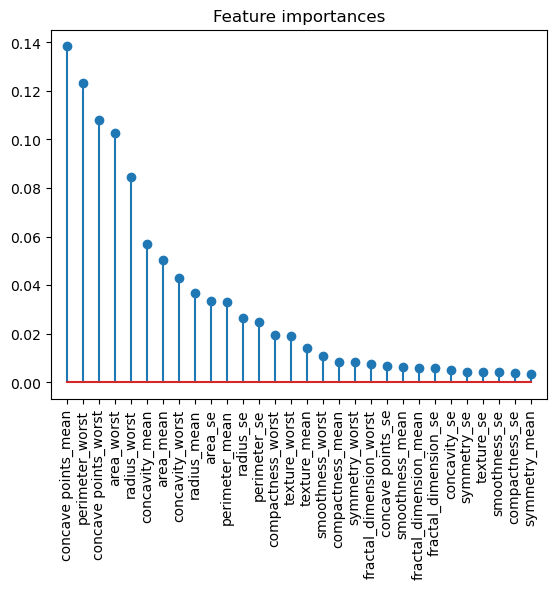

In [114]:
plt.figure()
plt.title("Feature importances")
plt.stem(range(n_feat), importances[indices[:n_feat]])
plt.xticks(range(n_feat), feats[indices[:n_feat]], rotation="vertical")
plt.xlim([-1, n_feat])
plt.show()


We are mostly interested in the sharp drops. In this case, the first 5 features are the most intersting.

---

## Hyperparameter tuning

In the previous modules, we showed how to create, train, predict, and even evaluate a predictive model. However, we did not change the models' parameters that can be given when creating an instance. For example, for k-nearest neighbors, we initially used this default parameter: `n_neighbors=5`.

These parameters are called **hyperparameters**: they are parameters used to control the learning process, for instance the parameter `k` of the k-nearest neighbors. Hyperparameters are **specified by the user**, often manually tuned (or by an exhaustive automatic search), and **cannot be estimated from the data**. They should not be confused with the other parameters that are inferred during the training process. These parameters define the model itself, for instance `coef_` for the linear models.

### Manual tuning

Let's go back to the full breast cancer data and train a simple predictive model made of a standard scaler followed by a Logistic Regression classifier.

In [117]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from pathlib import Path

# data prep
DATADIR = Path("data")
bc_data = pd.read_csv(DATADIR / "breast_cancer_diagnostic_data.csv")
bc_data = bc_data.dropna(axis=1)
bc_data = bc_data.drop(columns=["id"])
target_name = "diagnosis"
target = bc_data[target_name]
data_numeric = bc_data.drop(columns=target_name)

In [118]:
# define a Pipeline with default parameters
model = make_pipeline(StandardScaler(), LogisticRegression())
# run a default 5-fold cross-validation
cv_results = cross_validate(model, data_numeric, target)
# get the cross-validation scores
scores = cv_results["test_score"]
# average them and output
print(f"Cross-validation accuracy: {scores.mean():.3f} ± {scores.std():.3f}")

Cross-validation accuracy: 0.981 ± 0.007


Now, Logistic regression has a parameter `C`. We just created a model with the default `C` value that is equal to 1: check the default parameters by typing `LogisticRegression?` in an empty code cell.

In [119]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='deprecated',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices co

If we wanted to use a different `C` parameter we could have done so when we created the `LogisticRegression` object with something like `LogisticRegression(C=1e-3)`.

For more info about C, refer to the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [120]:
# define a Pipeline, this time using a custom value for LogisticRegression's C
model = make_pipeline(StandardScaler(), LogisticRegression(C=1e-3))
# run a default 5-fold cross-validation
cv_results = cross_validate(model, data_numeric, target)
# get the cross-validation scores
scores = cv_results["test_score"]
# average them and output
print(f"Cross-validation accuracy: {scores.mean():.3f} ± {scores.std():.3f}")

Cross-validation accuracy: 0.891 ± 0.034


We can systematically vary the value of C to see if there is an optimal value.

In [122]:
for C in [1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10]:
    model = make_pipeline(StandardScaler(), LogisticRegression(C=C))
    cv_results = cross_validate(model, data_numeric, target)
    scores = cv_results["test_score"]
    print(f"Cross-validation accuracy with C={C}: {scores.mean():.3f} ± {scores.std():.3f}")

Cross-validation accuracy with C=0.0001: 0.643 ± 0.012
Cross-validation accuracy with C=0.001: 0.891 ± 0.034
Cross-validation accuracy with C=0.01: 0.949 ± 0.013
Cross-validation accuracy with C=0.1: 0.977 ± 0.007
Cross-validation accuracy with C=1: 0.981 ± 0.007
Cross-validation accuracy with C=5: 0.970 ± 0.014
Cross-validation accuracy with C=10: 0.968 ± 0.012


It seems like the model reaches peak performance for one value of `C`.

---

## Exercise

Here you will fit a tree-based classifier, called Histogram-based Gradient Boosting classifier, on the breast cancer dataset.

In [124]:
from sklearn.ensemble import HistGradientBoostingClassifier as HGBC

Create a new instance of a Histogram-based Gradient Boosting classifier. Like we did earlier with the Random Forest classifier, be sure set the `random_state` parameter when you create the model. If you want to honor the traditions, you can set `random_state=42`. :)

In [125]:
model = make_pipeline(StandardScaler(), HGBC(random_state=42))

Split the data into training and test sets, this time using a 70/30% partition.

In [126]:
# train/test split
x_train, x_test, y_train, y_test = train_test_split(data_numeric, 
                                                    target, 
                                                    test_size=0.3,
                                                    random_state=99)


You will now perform a search of the best combination of two hyperparameters.

HistGradientBoostingClassifier has many hyperparameters (check its [online documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html)). You will focus on `learning_rate` and `max_leaf_nodes`, making a search of their best combination using the following search:

- `learning_rate` for the values 0.01, 0.1, 1 and 10. This parameter controls the ability of a new tree to correct the error of the previous sequence of trees
- `max_leaf_nodes` for the values 3, 10, 30. This parameter controls the depth of each tree.

To search for the best combination of two parameters, you'll need to use two nested `for` loops. The order of the nesting is irrelevant.

In the inner `for` loop:

- Create a new instance of a Histogram-based Gradient Boosting classifier, setting the `learning_rate` and `max_leaf_nodes` parameters based on the current loop variables. Like we did earlier with the Random Forest classifier, be sure to also set the `random_state` parameter when you create the model. If you want to honor the traditions, you can set `random_state=42`. :)
- Train the model with `cross_validate`. Use `cross_validate` with a simple 2-fold cross-validation to speed things up if you will. Compute the average cross-validation score, and print it together with the parameter values.

Here's a pseudocode to guide you:

```python
param1_values = ...
param2_values = ...

for param1 in param1_values:
    for param2 in param2_values:
        model = ...
        scores = ...
        avg_score = ...
        ...
```

In [129]:
for lr in [1e-2, 1e-1, 1, 10]:
    for mln in [3,10,30]:
        model = make_pipeline(StandardScaler(), HGBC(learning_rate=lr, max_leaf_nodes=mln, random_state=42))
        cv_results = cross_validate(model, x_train, y_train, cv=2)
        scores = cv_results["test_score"]
        print(f"Cross-validation accuracy with lr={lr} and mln={mln}: {scores.mean():.3f} ± {scores.std():.3f}")

Cross-validation accuracy with lr=0.01 and mln=3: 0.915 ± 0.030
Cross-validation accuracy with lr=0.01 and mln=10: 0.927 ± 0.033
Cross-validation accuracy with lr=0.01 and mln=30: 0.927 ± 0.033
Cross-validation accuracy with lr=0.1 and mln=3: 0.945 ± 0.015
Cross-validation accuracy with lr=0.1 and mln=10: 0.935 ± 0.010
Cross-validation accuracy with lr=0.1 and mln=30: 0.935 ± 0.010
Cross-validation accuracy with lr=1 and mln=3: 0.945 ± 0.015
Cross-validation accuracy with lr=1 and mln=10: 0.940 ± 0.015
Cross-validation accuracy with lr=1 and mln=30: 0.940 ± 0.015
Cross-validation accuracy with lr=10 and mln=3: 0.329 ± 0.188
Cross-validation accuracy with lr=10 and mln=10: 0.681 ± 0.093
Cross-validation accuracy with lr=10 and mln=30: 0.681 ± 0.093


Manually identify the best parameters from the above procedure. Use them to evaluate the model on the test set. For this, you'll first need to (re)fit the best model on the whole training data, and then compute the performance on the test set.

In [134]:
best_lr = 1
best_mln = 10
# alternative way to set model's parameters
model.set_params(learning_rate=best_lr, max_leaf_nodes=best_mln)
# refit on the whole training data
model.fit(x_train, y_train)
# compute the performance on the test set
test_score = model.score(x_test, y_test)

print(f"Test score after the parameter tuning: {test_score:.3f}")

Test score after the parameter tuning: 0.988


**Bonus**

Modify your code in order to output the best average cross-validation score and the corresponding parameters just after the nested for loop.

In [133]:
# train/test split
data_train, data_test, target_train, target_test = train_test_split(
    data_numeric, target, test_size=0.30, random_state=42
)

# manual hyperparameter tuning
learning_rate = [0.01, 0.1, 1, 10]
max_leaf_nodes = [3, 10, 30]

# to keep track of the scores
best_score = 0
best_params = {}

for lr in learning_rate:
    for mln in max_leaf_nodes:
        print(
            f"Evaluating model with learning rate {lr:.3f}" f" and max leaf nodes {mln}"
        )
        model = HGBC(
            learning_rate=lr, max_leaf_nodes=mln, random_state=42
        )
        scores = cross_validate(model, data_train, target_train, cv=2)
        mean_score = scores["test_score"].mean()
        print(f"  score: {mean_score:.3f}")
        # compare score with current best score
        if mean_score > best_score:
            # found a better score! Update current best score
            best_score = mean_score
            # update current best parameters
            best_params = {"learning-rate": lr, "max leaf nodes": mln}
            print(f"  *** Found new best model with score {best_score:.3f}!")

        # blank new line for better formatting
        print()

print(f"The best accuracy obtained is {best_score:.3f}")
print(f"The best parameters found are:\n {best_params}")

best_lr = best_params["learning-rate"]
best_mln = best_params["max leaf nodes"]

# alternative way to set model's parameters
model.set_params(learning_rate=best_lr, max_leaf_nodes=best_mln)
# refit on the whole training data
model.fit(data_train, target_train)
# compute the performance on the test set
test_score = model.score(data_test, target_test)

print(f"Test score after the parameter tuning: {test_score:.3f}")

Evaluating model with learning rate 0.010 and max leaf nodes 3
  score: 0.922
  *** Found new best model with score 0.922!

Evaluating model with learning rate 0.010 and max leaf nodes 10
  score: 0.935
  *** Found new best model with score 0.935!

Evaluating model with learning rate 0.010 and max leaf nodes 30
  score: 0.935

Evaluating model with learning rate 0.100 and max leaf nodes 3
  score: 0.955
  *** Found new best model with score 0.955!

Evaluating model with learning rate 0.100 and max leaf nodes 10
  score: 0.955

Evaluating model with learning rate 0.100 and max leaf nodes 30
  score: 0.955

Evaluating model with learning rate 1.000 and max leaf nodes 3
  score: 0.960
  *** Found new best model with score 0.960!

Evaluating model with learning rate 1.000 and max leaf nodes 10
  score: 0.965
  *** Found new best model with score 0.965!

Evaluating model with learning rate 1.000 and max leaf nodes 30
  score: 0.965

Evaluating model with learning rate 10.000 and max leaf no

---

## Automated tuning by grid-search

Instead of using a `for` loop manually for each hyperparameter to find the best combination over a fixed grid of values, we can use scikit-learn's `GridSearchCV` class that implements a very similar logic with less repetitive code.

`GridSearchCV` is an estimator itself: this means that we can use the methods `fit` and `predict` on it. 

Let's see how to use it for doing such hyperparameter search using another tree-based classifier (histogram gradient-boosting). By the way, we are also exploring an alternate way of creating a Pipeline with named steps.

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

# split the data
data_train, data_test, target_train, target_test = train_test_split(data_numeric, 
                                                                    target,
                                                                    test_size=0.25,
                                                                    random_state=42)

model = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", HistGradientBoostingClassifier(random_state=42))])

model

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 HistGradientBoostingClassifier(random_state=42))])

Since the grid-search will be costly, we will only explore a few combinations
for `learning_rate` and `max_leaf_nodes`.

In [136]:
param_grid = {
    "classifier__learning_rate": [0.01, 0.1, 1, 10], # classifier + "__" + param name
    "classifier__max_leaf_nodes":  [3, 10, 30],  # comma is okay in python for the last item

}

model_grid_search = GridSearchCV(model, param_grid=param_grid, cv=2, n_jobs=2)
model_grid_search.fit(data_train, target_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        HistGradientBoostingClassifier(random_state=42))]),
             n_jobs=2,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 1, 10],
                         'classifier__max_leaf_nodes': [3, 10, 30]})

Finally, we will check the accuracy of our model using the test set:

In [137]:
accuracy = model_grid_search.score(data_test, target_test)
print(f"The test set accuracy of the grid-search pipeline is {accuracy:.2f}")

The test set accuracy of the grid-search pipeline is 0.94


<div class="admonition warning alert alert-danger">
<p class="first admonition-title" style="font-weight: bold;">Warning</p>
<p>Be aware that the evaluation should normally be performed through
cross-validation by providing <tt class="docutils literal">model_grid_search</tt> as a model to the
<tt class="docutils literal">cross_validate</tt> function.</p>
<p class="last">Here, we used a single train-test split to evaluate <tt class="docutils literal">model_grid_search</tt>.
</p>
</div>

The `GridSearchCV` estimator takes a `param_grid` parameter which defines
all hyperparameters and their associated values. The grid-search will be in
charge of creating all possible combinations and test them.

Once the grid-search is fitted, it can be used as any other predictor by
calling `predict`. Internally, it will use the model with
the best parameters found during `fit`.

Get predictions for the 5 first samples using the estimator with the best
parameters.

In [138]:
model_grid_search.predict(data_test.iloc[0:5])

array(['B', 'M', 'M', 'B', 'B'], dtype=object)

You can know about these parameters by looking at the `best_params_`
attribute.

In [139]:
print(f"The best set of parameters is: "
      f"{model_grid_search.best_params_}")

The best set of parameters is: {'classifier__learning_rate': 0.1, 'classifier__max_leaf_nodes': 3}


### Nested cross-validation for parameter optimization

When you have to train a model in which hyperparameters also need to be optimized, you'll often want to use a nested cross-validation (CV) approach.

In fact, if you choose the parameters that maximize non-nested CV, you will get an overly-optimistic score, because the model is biased to the dataset.

Nested CV effectively uses a series of train/validation/test set splits through an inner loop and an outer loop. 

- In the inner loop, a `GridSearchCV` maximizes the score selecting (hyper)parameters over the validation sets.
- In the outer loop, `cross_validate` estimates generalization error of the best model by averaging test set scores over several dataset splits.

In [140]:
outer_cv = StratifiedKFold(n_splits=5)
inner_cv = StratifiedShuffleSplit(n_splits=2, random_state=42)

mcc_scorer = make_scorer(matthews_corrcoef)

clf = GridSearchCV(model, param_grid=param_grid, cv=inner_cv, scoring=mcc_scorer) # inner cv finds the best model then apply to out cv
nested_score = cross_validate(
    clf, data_train, target_train, cv=outer_cv, scoring=mcc_scorer, n_jobs=2
)

In [141]:
nested_score["test_score"].mean()

0.9299122629751768

In [142]:
nested_score["test_score"].std()

0.02957563178273088

After the nested CV, you get an estimation of the generalization error of the underlying model.

Now, you can evaluate the model on the held-out test set. To do so, you repeat the hyperparameter optimization on the whole training data `data_train`, and predict the labels of the test data `data_test`.

In [143]:
clf.fit(data_train, target_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=2, random_state=42, test_size=None,
            train_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        HistGradientBoostingClassifier(random_state=42))]),
             param_grid={'classifier__learning_rate': [0.01, 0.1, 1, 10],
                         'classifier__max_leaf_nodes': [3, 10, 30]},
             scoring=make_scorer(matthews_corrcoef, response_method='predict'))

In [144]:
clf.best_params_

{'classifier__learning_rate': 1, 'classifier__max_leaf_nodes': 30}

In [145]:
ypred_test = clf.predict(data_test)
matthews_corrcoef(target_test, ypred_test)

0.9107365792759051

---

## Credits

Parts of this notebook are adapted/abridged from INRIA scikit-learn course (CC-BY 4.0) and R. Burke Squires (CC-BY-SA 3.0)